# **PROJECT 3:** Dengue Cases in the Philippines (2016–2020): Exploratory Data Analysis 🦟
---

# **ANALYST:** Rhealyn Vasquez

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
dengue_df = pd.read_csv('datasets\\dengue.csv')

## 📌 Project Objective

The primary goal of this project is to conduct an in-depth **Exploratory Data Analysis (EDA)** on the dengue fever cases recorded in the **Philippines from 2016 to 2020**. The analysis aims to:

- Uncover **trends** in dengue incidence and fatalities.
- Identify **high-risk regions** with consistent or severe outbreaks.
- Understand **seasonal patterns** in dengue case reports.
- Derive **actionable insights** from the dataset to support public health awareness and interventions.

---

## Dataset Description

The dataset contains aggregated information on **suspected and confirmed dengue cases** across different regions and time periods in the Philippines. Below is a summary of the key features:

| Feature       | Description                                                       |
|---------------|-------------------------------------------------------------------|
| `Region` / `Province` | The geographical location (e.g., region or province) where the cases were reported. |
| `Date`        | The date of reporting, typically aggregated by **week** or **month**. |
| `Cases`       | The total number of **dengue cases** recorded.                    |
| `Fatalities`  | The number of **deaths** attributed to dengue.                    |

---

##  Key Research Questions

This analysis aims to answer the following questions:

1. **What is the overall trend** of dengue cases and fatalities across the five-year period?
2. **Which regions** consistently report the highest number of dengue cases?
3. **Is there a seasonal pattern?** When do dengue cases typically peak during the year?
4. **Which year** between 2016 and 2020 had the most severe dengue outbreak?

---

## 🛠️ Tools and Libraries

The project will be implemented using **Python**, leveraging the following core data science libraries:

| Library       | Purpose                                                                 |
|---------------|-------------------------------------------------------------------------|
| `Pandas`      | Data loading, cleaning, transformation, and manipulation.               |
| `NumPy`       | Performing numerical operations and calculations.                       |
| `Matplotlib`  | Creating static plots and charts for visualizing trends and comparisons.|
| `Seaborn`     | Building more complex and aesthetically pleasing statistical plots.     |

---

> The insights generated from this analysis may support better public health strategies, identify outbreak-prone areas, and help predict potential future outbreaks.


In [32]:
dengue_df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [33]:
#this shows the 5 first row
dengue_df.head()

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1


In [34]:
#this shows quick summary of the DataFrame
dengue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [35]:
# this shows quick statistics about the data
dengue_df.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [36]:
# This shows the total number of missing (NaN) values in each column of the dataframe.
dengue_df.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

# Interpretation 
Have 0 missing values, meaning the dataset is complete with no null entries. 
Your data is clean in terms of missing values — ready for further analysis (like visualization or modeling).

# Data Types Conversion

In [37]:
dengue_df['Month'] = dengue_df['Month'].astype('category')
dengue_df['Year'] = dengue_df['Year'].astype(int)
dengue_df['Region'] = dengue_df['Region'].astype('category')
dengue_df['Dengue_Cases'] = dengue_df['Dengue_Cases'].astype(float)
dengue_df['Dengue_Deaths'] = dengue_df['Dengue_Deaths'].astype(float)
dengue_df['Date'] = pd.to_datetime(
    dengue_df['Year'].astype(str) + '-' + dengue_df['Month'].astype(str) + '-01',
    errors='coerce'
)

In [38]:
#This is an attribute (not a function) that shows the data type of each column in a DataFrame.
dengue_df.dtypes

Month                  category
Year                      int64
Region                 category
Dengue_Cases            float64
Dengue_Deaths           float64
Date             datetime64[ns]
dtype: object

# Extract components from the datetime

In [39]:
dengue_df['Year'] = dengue_df['Date'].dt.year
dengue_df['Month'] = dengue_df['Date'].dt.month
dengue_df['Month_Name'] = dengue_df['Date'].dt.month_name()

dengue_df[['Date', 'Year', 'Month', 'Month_Name']].head()

,Date,Year,Month,Month_Name
0,2016-01-01,2016,1,January
1,2016-02-01,2016,2,February
2,2016-03-01,2016,3,March
3,2016-04-01,2016,4,April
4,2016-05-01,2016,5,May


# EXPLORATORY DATA ANALYSIS
---

# 1. What is the overall trend of dengue cases and fatalities across the five-year period?

In [40]:
yearly_summary = dengue_df.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()
yearly_summary['Cases_Change_%'] = yearly_summary['Dengue_Cases'].pct_change() * 100
yearly_summary['Deaths_Change_%'] = yearly_summary['Dengue_Deaths'].pct_change() * 100
yearly_summary[['Cases_Change_%', 'Deaths_Change_%']] = yearly_summary[['Cases_Change_%', 'Deaths_Change_%']].fillna(0)
yearly_summary

,Year,Dengue_Cases,Dengue_Deaths,Cases_Change_%,Deaths_Change_%
0,2016,209544.0,8127.0,0.000000,0.000000
1,2017,154155.0,4563.0,-26.433112,-43.853821
2,2018,250783.0,1226.0,62.682365,-73.131712
3,2019,441902.0,1733.0,76.208914,41.353997
4,2020,91041.0,1195.0,-79.397921,-31.044432


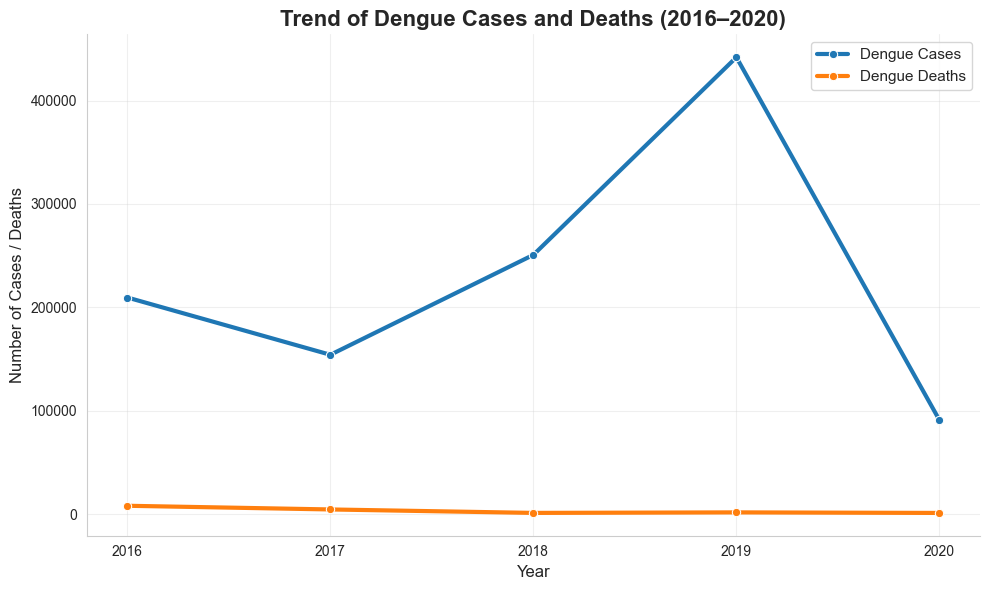

In [41]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=yearly_summary, x='Year', y='Dengue_Cases', marker='o', color='#1f77b4', linewidth=3, label='Dengue Cases')
sns.lineplot(data=yearly_summary, x='Year', y='Dengue_Deaths', marker='o', color='#ff7f0e', linewidth=3, label='Dengue Deaths')

plt.title('Trend of Dengue Cases and Deaths (2016–2020)', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Cases / Deaths', fontsize=12)
plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.legend(title='', fontsize=11)
plt.grid(alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

# INSIGHT 1:
From 2016 to 2020, dengue cases and deaths changed noticeably over the years. The number of cases rose sharply and reached its highest point in 2019, but then dropped significantly in 2020, likely due to stronger health measures and changes in human activity during the COVID-19 pandemic. This trend is supported by a study published in *BioMed Central* — [Pre- and post-COVID-19 pandemic identification of dengue hotspots and exploration of population and environmental determinants of dengue in Quezon City, Philippines](https://tropmedhealth.biomedcentral.com/articles/10.1186/s41182-025-00789-3?utm_source=chatgpt.com), which also reported a decrease in dengue cases in 2020 compared to previous years.

# 2. Which regions consistently report the highest number of dengue cases?

In [42]:
region = dengue_df.groupby('Region')['Dengue_Cases'].sum().reset_index()
region = region.sort_values(by='Dengue_Cases', ascending=False)
region

,Region,Dengue_Cases
6,Region IV-A,163029.0
5,Region III,131064.0
10,Region VI,117523.0
2,NCR,115966.0
11,Region VII,110683.0
13,Region X,82437.0
15,Region XII,59802.0
3,Region I,59066.0
12,Region VIII,51983.0
8,Region IX,47781.0


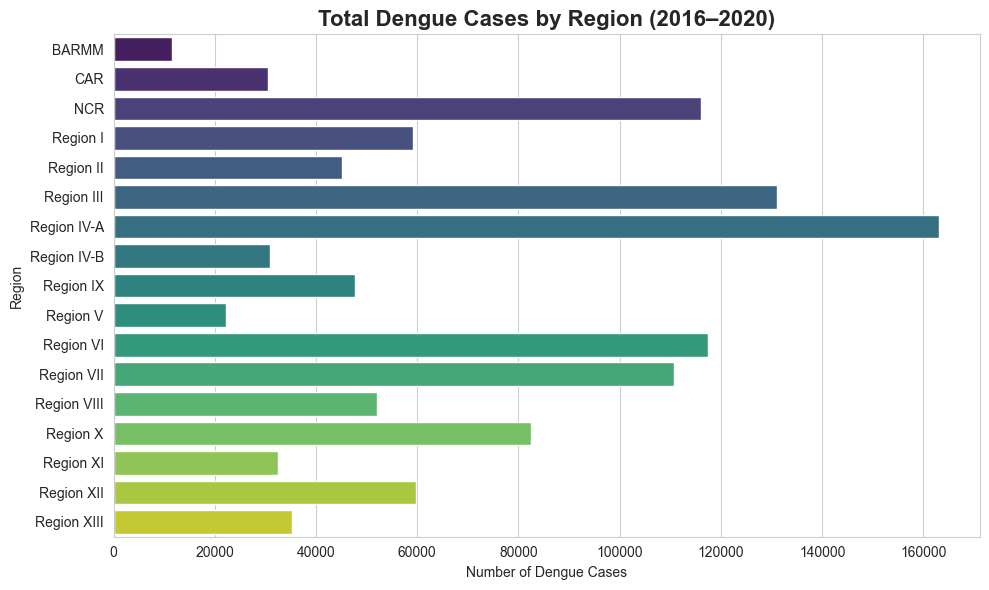

In [43]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(data=region, x='Dengue_Cases', y='Region', palette='viridis')

plt.title('Total Dengue Cases by Region (2016–2020)', fontsize=16, weight='bold')
plt.xlabel('Number of Dengue Cases')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

# INSIGHT 2: 
Across all regions, Region IV-A (CALABARZON) recorded the highest total number of dengue cases, followed by Region III (Central Luzon) and Region VI (Western Visayas). The National Capital Region (NCR) also reported a large number of cases, reflecting the effect of dense urban populations. In contrast, BARMM and Region V had the lowest reported dengue cases. This pattern suggests that highly urbanized and densely populated regions tend to experience more dengue transmission due to favorable conditions for mosquito breeding and greater human exposure.

---

**💡 Recommendations and Suggestions:**
1. **Intensify Dengue Prevention in High-Risk Urban Areas**
    - Focus vector control and public awareness programs in regions like CALABARZON, Central Luzon, and NCR, where dense populations and urban settings create ideal conditions for mosquito breeding.

2. **Improve Waste and Water Management Systems**
     - Strengthen drainage, waste disposal, and sanitation infrastructure in urban communities to reduce stagnant water sources and limit mosquito reproduction.

# 3. Is there a seasonal pattern? When do dengue cases typically peak during the year?

In [44]:
month_dict = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

monthly_summary = dengue_df.groupby('Month')['Dengue_Cases'].sum().reset_index()
monthly_summary['Month'] = monthly_summary['Month'].map(month_dict)
monthly_summary = monthly_summary.set_index('Month').reindex([
    'January','February','March','April','May','June','July','August',
    'September','October','November','December'
]).reset_index()

monthly_summary


,Month,Dengue_Cases
0,January,84328.0
1,February,77801.0
2,March,57576.0
3,April,32508.0
4,May,32387.0
5,June,58110.0
6,July,138242.0
7,August,187554.0
8,September,177943.0
9,October,117645.0


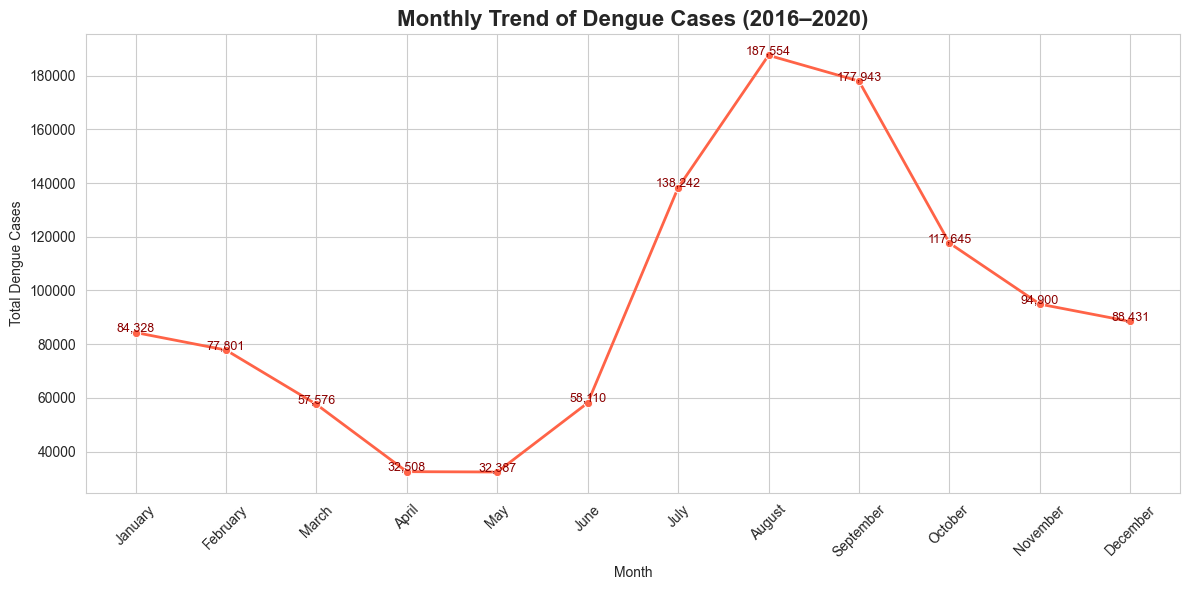

In [45]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_summary, x='Month', y='Dengue_Cases', marker='o', color='tomato', linewidth=2)

for i in range(len(monthly_summary)):
    plt.text(i, monthly_summary['Dengue_Cases'][i]+500, f"{int(monthly_summary['Dengue_Cases'][i]):,}", 
             ha='center', fontsize=9, color='darkred')

plt.title('Monthly Trend of Dengue Cases (2016–2020)', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Total Dengue Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# INSIGHT 3:  
Dengue cases usually peak during the rainy season, especially from **July to October**, when stagnant water allows mosquitoes to breed easily. Cases start to rise in the middle of the year, reach their highest around **August or September**, and then drop toward the end of the year. This seasonal pattern shows that rainfall and humidity play a big role in dengue spread.  

---

**💡 Recommendations and Suggestions:**  
1. **Increase Mosquito Control Before and During Rainy Months**  
   - Conduct regular fogging, larvicide treatments, and clean-up drives before the rainy season to reduce mosquito breeding sites.  

2. **Raise Public Awareness About Dengue Prevention**  
   - Encourage communities to remove stagnant water from containers, rooftops, and gutters, and promote personal protection measures like using mosquito repellent and nets.

In [46]:
yearly_summary = dengue_df.groupby('Year')['Dengue_Cases'].sum().reset_index()
most_severe_year = yearly_summary.sort_values(by='Dengue_Cases', ascending=False).head()
most_severe_year

,Year,Dengue_Cases
3,2019,441902.0
2,2018,250783.0
0,2016,209544.0
1,2017,154155.0
4,2020,91041.0


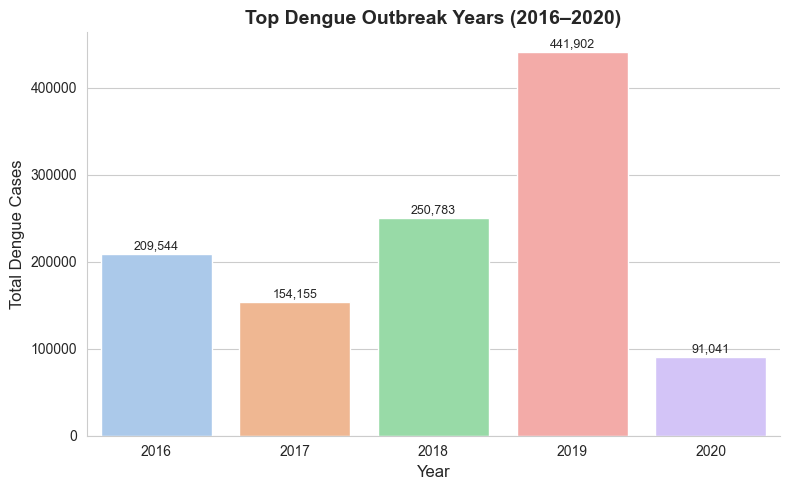

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(data=most_severe_year, x='Year', y='Dengue_Cases', hue='Year', palette='pastel', dodge=False)

for i, row in most_severe_year.iterrows():
    plt.text(i, row['Dengue_Cases'] + 5000, f"{int(row['Dengue_Cases']):,}", ha='center', fontsize=9)

plt.title('Top Dengue Outbreak Years (2016–2020)', fontsize=14, weight='bold')
plt.ylabel('Total Dengue Cases', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend([],[], frameon=False)
sns.despine()
plt.tight_layout()
plt.show()

# INSIGHT 4: 
The year 2019 had the most severe dengue outbreak between 2016 and 2020, with 441,902 reported cases, almost double compared to 2018. This shows that dengue transmission can rise sharply in a short time, highlighting the importance of careful monitoring and timely public health actions. This trend is supported by a report in *The BMJ* — [Dengue: Philippines declares national epidemic as cases surge](https://www.bmj.com/content/366/bmj.l5098), which describes the sharp increase in dengue cases in 2019 and the national epidemic declaration.

# 5. Which specific month experiences the peak number of dengue cases?

In [48]:
monthly_cases = dengue_df.groupby('Month_Name')['Dengue_Cases'].sum().reset_index()
top_month = monthly_cases.sort_values(by='Dengue_Cases', ascending=False).head(3)
top_month

,Month_Name,Dengue_Cases
1,August,187554.0
11,September,177943.0
5,July,138242.0


# Insight 5:
Dengue cases in the Philippines usually start rising in the middle of the year and peak in **August**, which coincides with the height of the rainy season. During this period, heavy rainfall leads to the accumulation of stagnant water in households, drainage systems, and other outdoor areas. These conditions create ideal breeding sites for Aedes mosquitoes, which are the primary carriers of the dengue virus. As a result, the risk of dengue transmission significantly increases during these months.

# Insight 6:
After the peak months, dengue cases generally decline toward the end of the year as rainfall decreases and mosquito breeding sites are reduced. Cooler temperatures and drier conditions make the environment less favorable for mosquito reproduction, leading to a natural decrease in dengue transmission. This seasonal trend demonstrates how closely dengue incidence is tied to climatic and environmental factors.

This pattern is supported by a study in *Science of The Total Environment* — [High relative humidity might trigger the occurrence of the second seasonal peak of dengue in the Philippines](https://www.sciencedirect.com/science/article/abs/pii/S0048969719348417), which highlights the link between rainfall, mosquito density, and dengue transmission.

# 6. Which regions have the highest dengue death rates?

In [49]:
# Calculate case-fatality rate
dengue_df['CFR'] = (dengue_df['Dengue_Deaths'] / dengue_df['Dengue_Cases']) * 100

region_cfr = dengue_df.groupby('Region')['CFR'].mean().reset_index()
region_cfr = region_cfr.sort_values(by='CFR', ascending=False)
region_cfr

,Region,CFR
2,NCR,9.412707
16,Region XIII,9.369061
15,Region XII,7.892293
1,CAR,6.973348
0,BARMM,6.573534
8,Region IX,5.015920
12,Region VIII,4.466547
10,Region VI,4.404830
13,Region X,3.933678
14,Region XI,3.816698


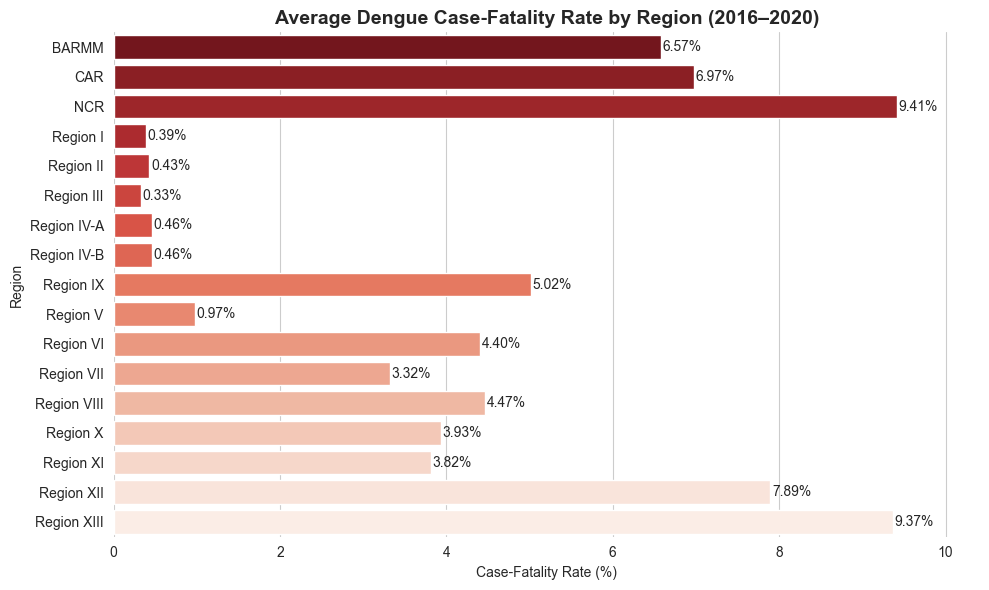

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(data=region_cfr, y='Region', x='CFR', palette='Reds_r')

for i, row in region_cfr.iterrows():
    plt.text(row['CFR'] + 0.02, i, f"{row['CFR']:.2f}%", va='center')

plt.title('Average Dengue Case-Fatality Rate by Region (2016–2020)', fontsize=14, weight='bold')
plt.xlabel('Case-Fatality Rate (%)')
plt.ylabel('Region')
plt.xlim(0, region_cfr['CFR'].max() + 1)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# INSIGHT 7:

The highest average case-fatality rates (CFR) were observed in NCR (9.41%), Region XIII (9.37%), and Region XII (7.89%), even though these regions may not have the largest number of dengue cases. This suggests that in these areas, dengue infections tend to be more severe or that healthcare access and treatment may be delayed, increasing the risk of fatalities.

# INSIGHT 8:

Regions such as Region IV-A (0.46%), Region IV-B (0.46%), and Region III (0.33%) recorded the lowest case-fatality rates, reflecting effective case management and timely medical treatment, despite Region IV-A having the highest number of dengue cases. This indicates that efficient healthcare response can significantly reduce fatalities even in areas with a large number of infections.

**💡 Recommendation:**

1. **Enhance Healthcare Services in High-CFR Regions**
   - Increase the availability of hospitals, clinics, and trained medical staff in NCR, Region XIII, and Region XII to ensure timely treatment and reduce dengue fatalities.

# 7. Is there a relationship between the total number of dengue cases and the mortality rate across different regions?

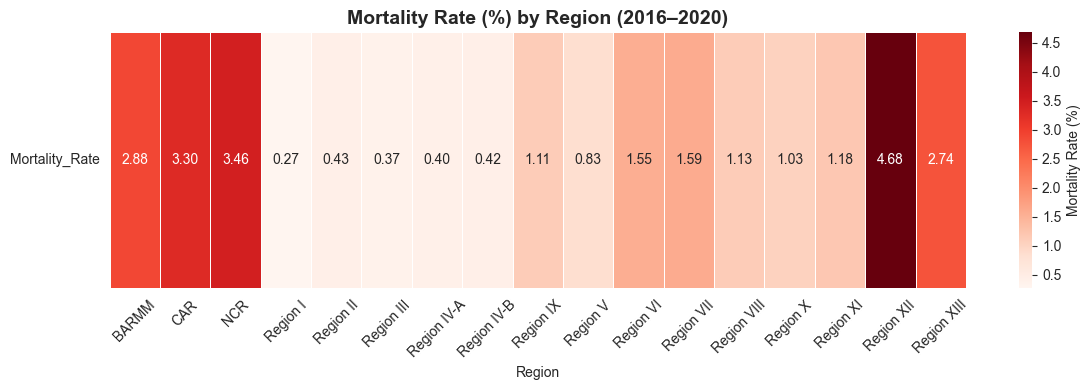

In [51]:
region_mortality = dengue_df.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()
region_mortality['Mortality_Rate'] = (region_mortality['Dengue_Deaths'] / region_mortality['Dengue_Cases']) * 100

mortality_pivot = region_mortality.set_index('Region')[['Mortality_Rate']].T

plt.figure(figsize=(12,4))
sns.heatmap(mortality_pivot, annot=True, fmt=".2f", cmap='Reds', linewidths=0.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Mortality Rate (%) by Region (2016–2020)', fontsize=14, weight='bold')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insight 9:

Some regions with fewer dengue cases, such as NCR and Region XII, still report higher mortality rates. This implies that factors beyond case numbers—like population density, environmental conditions, or prevalence of comorbidities—can influence dengue severity and outcomes.

# Insight 10:

Regions with the highest number of dengue cases, like Region IV-A, maintain relatively low mortality rates. This suggests that community-level factors, such as public awareness, early symptom recognition, and local health infrastructure, play a significant role in reducing deaths during outbreaks.

# 8. Which months or seasons have higher dengue death rates, even if the number of cases is not the highest?

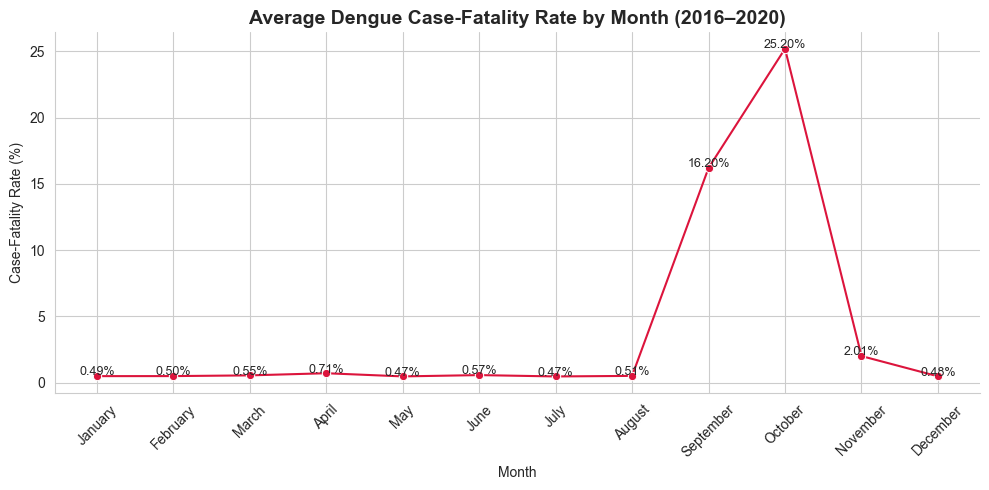

In [52]:
dengue_df['Month'] = dengue_df['Date'].dt.month_name()
dengue_df['CFR'] = (dengue_df['Dengue_Deaths'] / dengue_df['Dengue_Cases']) * 100
monthly_cfr = dengue_df.groupby('Month')['CFR'].mean().reindex([
    'January','February','March','April','May','June','July','August',
    'September','October','November','December'
]).reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_cfr, x='Month', y='CFR', marker='o', color='crimson')
for i, row in monthly_cfr.iterrows():
    plt.text(i, row['CFR'] + 0.05, f"{row['CFR']:.2f}%", ha='center', fontsize=9)
plt.xticks(rotation=45)
plt.title('Average Dengue Case-Fatality Rate by Month (2016–2020)', fontsize=14, weight='bold')
plt.ylabel('Case-Fatality Rate (%)')
plt.xlabel('Month')
sns.despine()
plt.tight_layout()
plt.show()

# Insight 11:
The highest dengue case-fatality rates occur in **October**, indicating that infections during this month are more severe or that healthcare systems may be more strained, increasing the risk of death. This suggest that hospital should strengthen preparedness and resource allocation in September–October to ensure sufficient medical staff, beds, and supplies to handle severe cases.

# Insight 12:
Months from January to August show consistently lower case-fatality rates, suggesting that dengue cases earlier in the year are generally less severe and more effectively managed.This also suggest to conduct preventive campaigns and community awareness programs, such as eliminating mosquito breeding sites and educating the public about early dengue symptoms.

# 9. Which regions consistently show the highest dengue cases during the peak season, and how do their monthly trends compare?

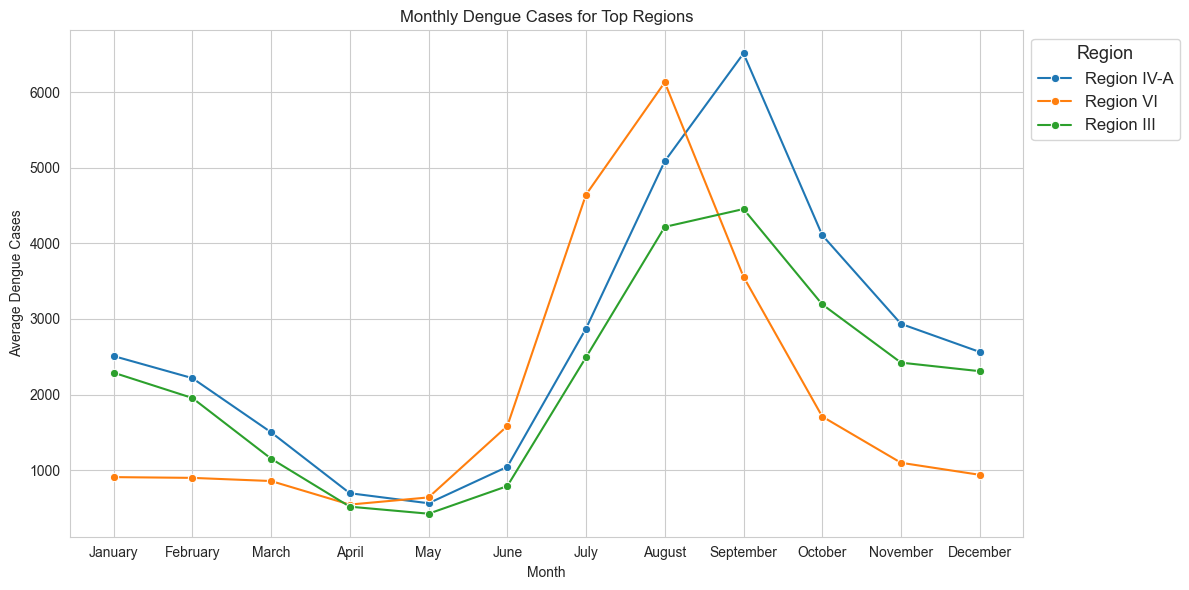

In [53]:
months_order = ['January','February','March','April','May','June','July','August',
                'September','October','November','December']
dengue_df['Month_Name'] = pd.Categorical(dengue_df['Month_Name'], categories=months_order, ordered=True)

monthly_avg = dengue_df.groupby(['Region','Month_Name'])['Dengue_Cases'].mean().reset_index()
monthly_avg = monthly_avg.dropna(subset=['Dengue_Cases'])

peak_cases = monthly_avg.loc[monthly_avg.groupby('Region')['Dengue_Cases'].idxmax()]
peak_cases_sorted = peak_cases.sort_values('Dengue_Cases', ascending=False)

top_regions = peak_cases_sorted['Region'].head(3)
top_monthly = monthly_avg[monthly_avg['Region'].isin(top_regions)]

plt.figure(figsize=(12,6))
sns.lineplot(data=top_monthly, x='Month_Name', y='Dengue_Cases', hue='Region', hue_order=top_regions, marker='o')
plt.title('Monthly Dengue Cases for Top Regions')
plt.ylabel('Average Dengue Cases')
plt.xlabel('Month')

plt.legend(title='Region', fontsize=12, title_fontsize=13, frameon=True, loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

# Insight 13:
The peak of dengue season happens at different times in different places. Region VI gets the most cases in August, but Region IV-A and Region III peak a month later in September. This means a single national alert isn't the best strategy. This suggests that health officials should schedule their public warnings and preparations based on each region’s specific peak time.

# Insight 14:
All three regions have a consistent "low season" for dengue from January to May, with cases starting to climb everywhere in June. This predictable quiet period is the perfect opportunity to act. This suggests that the best time to run community cleanup drives and awareness campaigns is during the first five months of the year to prevent a severe outbreak later.

# Insight 15:
After the peak, dengue cases in Region VI drop off quickly, but they stay high for much longer in Region IV-A and Region III, even into November. This shows that the dengue season is more prolonged in some areas. This suggests that while some regions can relax sooner, hospitals in Regions IV-A and III need to remain on high alert with enough staff and supplies until the end of the year.

# PREDICTION USING LINEAR REGRESSION

# 10. How does the number of dengue cases vary across Luzon, Visayas, and Mindanao, and which island group shows the strongest influence on dengue trends over time?

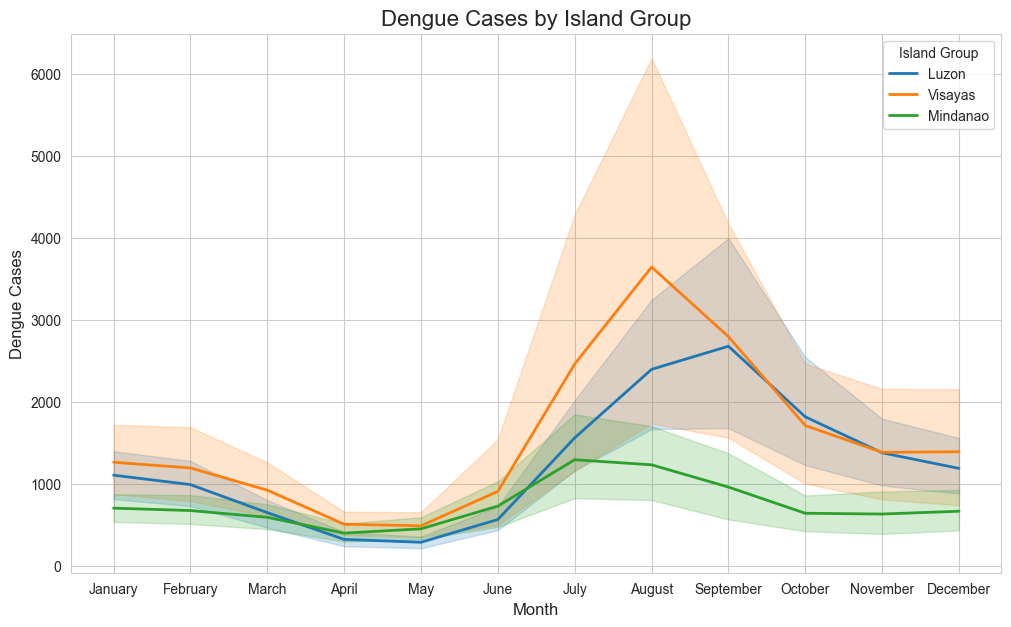

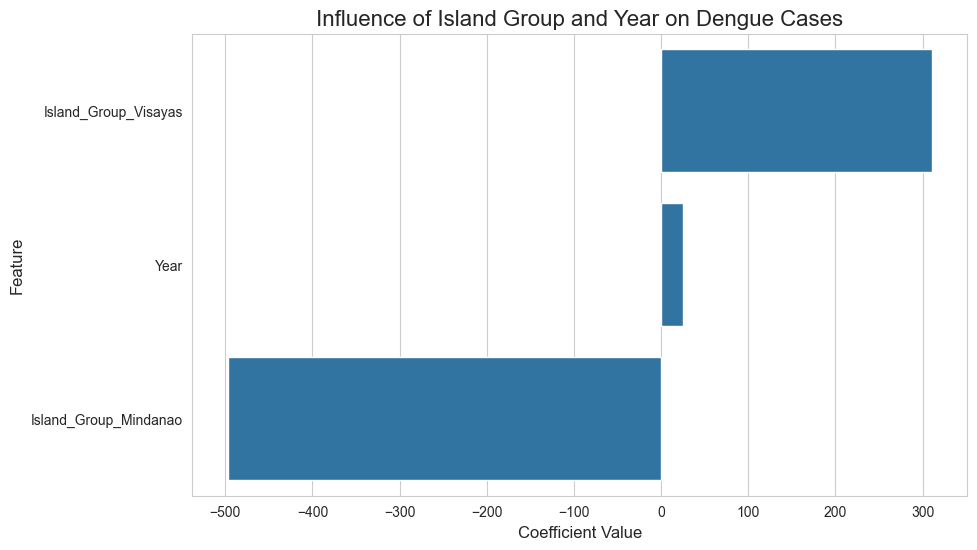

In [60]:
region_groups = {
    'Luzon': ['Region I', 'Region II', 'Region III', 'Region IV-A', 'Region IV-B', 'Region V', 'CAR', 'NCR'],
    'Visayas': ['Region VI', 'Region VII', 'Region VIII'],
    'Mindanao': ['Region IX', 'Region X', 'Region XI', 'Region XII', 'Region XIII', 'BARMM']
}

dengue_df['Island_Group'] = dengue_df['Region'].map(
    {r: g for g, rs in region_groups.items() for r in rs}
)

plt.figure(figsize=(12,7))
sns.lineplot(data=dengue_df, x='Month', y='Dengue_Cases', hue='Island_Group', linewidth=2)
plt.title("Dengue Cases by Island Group", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Dengue Cases", fontsize=12)
plt.legend(title="Island Group", fontsize=10)
plt.show()

encoded = pd.get_dummies(dengue_df, columns=['Island_Group'], drop_first=True)
X = encoded[['Year'] + [c for c in encoded.columns if 'Island_Group_' in c]]
y = encoded['Dengue_Cases']

model = LinearRegression().fit(X, y)

coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_}).sort_values('Coefficient', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=coef, x='Coefficient', y='Feature')
plt.title("Influence of Island Group and Year on Dengue Cases", fontsize=16)
plt.xlabel("Coefficient Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()

# Insight 16:
Dengue cases rise sharply during the rainy months, especially from **July to September**.The **Visayas** record the highest number of cases, while **Mindanao** shows the lowest.This means dengue activity is not the same across the country — some island groups face stronger outbreaks than others.

##### Recommendation:
Health officials should prepare **earlier in the Visayas** (around **June**) and keep strong monitoring in **Luzon** during **August–September**. **Mindanao** should continue regular prevention and monitoring to avoid sudden outbreaks. Planning dengue prevention based on each island group’s peak season will help reduce cases more effectively.

# 11. Which regions in the Philippines are projected to have the highest dengue cases in 2026?

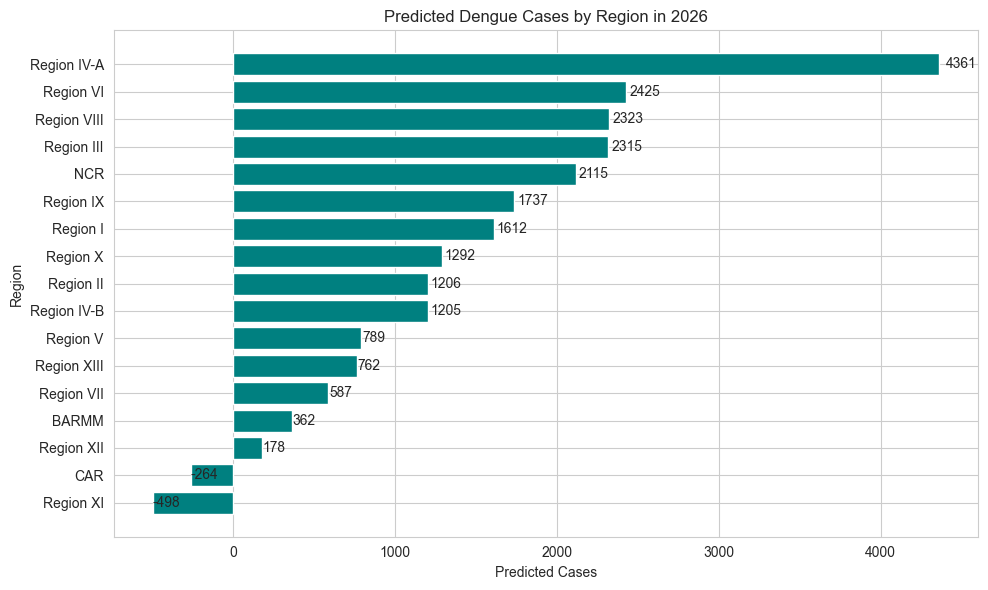

In [67]:
regions = dengue_df['Region'].unique()
predictions = []

for region in regions:
    data = dengue_df[dengue_df['Region'] == region]
    X = data[['Year']]
    y = data['Dengue_Cases']
    model = LinearRegression().fit(X, y)
    predictions.append((region, model.predict([[2026]])[0]))

predictions.sort(key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10,6))
bars = plt.barh([r for r, _ in predictions], [v for _, v in predictions], color='teal')
plt.title("Predicted Dengue Cases by Region in 2026")
plt.xlabel("Predicted Cases")
plt.ylabel("Region")
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width() + bar.get_width() * 0.01,
             bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.0f}", va='center')

plt.tight_layout()
plt.show()

# Insight 17:
Regions such as **Region VI (Western Visayas)** and **Region IV-A (CALABARZON)** show the **highest predicted dengue cases for 2026**, continuing their upward trend from previous years. These areas remain **major hotspots** that need consistent monitoring and early action before the rainy season.

# Insight 18:
Regions like **BARMM**, and **Region XII**, show lower predicted cases, but their numbers are still slowly increasing. This means **no region is completely safe**, and dengue prevention efforts should continue nationwide, even in areas with fewer cases.

# 12. Will dengue deaths in Region IV-A (CALABARZON) continue to rise in 2026, and what does this trend suggest for future prevention efforts?

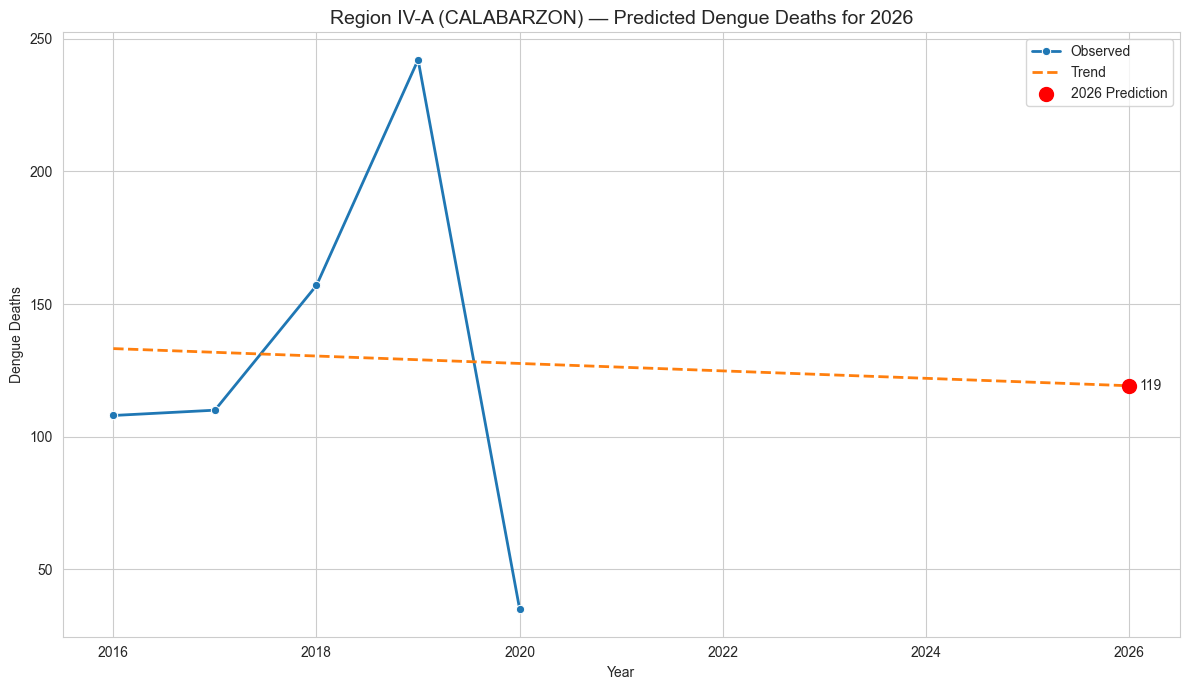

In [65]:
region_df = dengue_df[dengue_df['Region'] == 'Region IV-A']
yearly = region_df.groupby('Year', as_index=False)['Dengue_Deaths'].sum()

X = yearly[['Year']].values
y = yearly['Dengue_Deaths'].values
model = LinearRegression().fit(X, y)

years_plot = np.arange(yearly['Year'].min(), 2027).reshape(-1, 1)
pred_line = model.predict(years_plot)
pred_2026 = model.predict([[2026]])[0]

plt.figure(figsize=(12,7))
sns.lineplot(x=yearly['Year'], y=yearly['Dengue_Deaths'], marker='o', linewidth=2, label='Observed')
plt.plot(years_plot.flatten(), pred_line, linestyle='--', linewidth=2, label='Trend')
plt.scatter(2026, pred_2026, color='red', s=100, zorder=5, label='2026 Prediction')
plt.text(2026 + 0.1, pred_2026, f"{pred_2026:.0f}", va='center')
plt.title("Region IV-A (CALABARZON) — Predicted Dengue Deaths for 2026", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Dengue Deaths")
plt.legend()
plt.tight_layout()
plt.show()

# Insight 19:
The trend line shows a **gradual decrease** in dengue deaths in Region IV-A by 2026, dropping to around **119 deaths**. This suggests that recent dengue prevention and awareness programs may be helping reduce fatalities, though deaths remain significant.

# Insight 20:
Despite the projected decline, the data still shows **large fluctuations in past years**, meaning dengue deaths can spike unexpectedly. This indicates that outbreaks remain a **seasonal and unpredictable risk**, especially during heavy rainfall years.

**Suggestion:**  
Set up **year-round monitoring and rapid response teams** in high-risk cities within CALABARZON. Use real-time data tracking to respond quickly to any early signs of outbreak resurgence.